# Classifying The Brain on Music

Your objective is to classify fMRI brain images taken while listening to music in five different genres: label 0=Ambient Music, 1=Country Music, 2=Heavy Metal, 3=Rock 'n Roll, 4=Classical Symphonic. The data consists of train_data.csv, train_labels.csv, and test_data.csv, for a one-person subset of a larger 20-subject study, linked above.

The training data (train_data.csv) consist of 160 event-related brain images (trials), corresponding to twenty 6-second music clips, four clips in each of the five genres, repeated in-order eight times (runs). The labels (train_labels.csv) correspond to the correct musical genres, listed above, for each of the 160 trials.
There are 22036 features in each brain image, corresponding to blood-oxygenation levels at each 2mm-cubed 3D location within a section of the auditory cortex. In human brain imaging, there are often many more features (brain sites) than samples (trials), thus making the task a relatively challenging multiway classification problem.

The testing data (test_data.csv) consists of 40 event-related brain images corresponding to novel 6-second music clips in the five genres. The test data is in randomized order with no labels. You must predict, using only the given brain images, the correct genre labels (0-4) for the 40 test trials.

# Final Project
## "Classifying The Brain on Music"

Michael Casey, https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2017.01179/full

## 1. Multi-Class Genre Classifier

Build a multi-class classifier for the 5 music genres. Your goal is to train a model to classify brain images into corresponding genre categories. You are free to choose any machine learning models from the class.

## 1-1. Hyper-parameter Search  
Demonstrate your hyperparameter search process using cross-validation. Provide details for at least one hyperparameter with 10 different possible values.

## 1-2. Model Training and Testing
Following the hyperparameter search, train your model with the best combination of hyperparameters. Run the model on the test set and submit the results to the Kaggle competition. To get full marks, your model should outperform the baseline model, which is provided in Kaggle. You must show your test accuracy computed by Kaggle in this report.

## 1-3. Model Analysis
Conduct a thorough analysis of your model, including:

### 1-3-1. Confusion Matrix:
Split the training set into train/validation sets. The data is organized into eight runs, in order, with each run repeating the same 20 music trials. You should split the data by run. Retrain your model using the best hyperparameter combination. Present the confusion matrix on the validation set.

### 1-3-2. Example Examination:
Examine four validation samples where your model fails to classify into the correct category. Display the true label and the predicted label. Looking at the confusion matrix, how might you explain your results from the perspectives of human brain data and music genre similarity?



---

## **A. Data Download**
### For your convenience, we have provided code to download the dataset, which includes true labels, training data (features), training labels, and testing data (features).

###  A-1. Download Features and Labels.**
#### Run the following code to download the brain features and labels of the music clips.


In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# Define the file paths
file1_path = "/content/drive/My Drive/data/train_data.csv"
file2_path = "/content/drive/My Drive/data/test_data.csv"
file3_path = "/content/drive/My Drive/data/train_labels.csv"

# Load the data into Pandas DataFrames
train_data = pd.read_csv(file1_path)
test_data = pd.read_csv(file2_path)
tran_labels = pd.read_csv(file3_path)


In [ ]:
#!pip install gdown

In [6]:
# Data Import Method 1, with pandas
import pandas as pd
train_data = pd.read_csv("train_data.csv", header=None)
train_labels = pd.read_csv("train_labels.csv", header=None)
test_data = pd.read_csv("test_data.csv", header=None)

print('train_data.shape: {}'.format(train_data.shape))
print('train_labels.shape: {}'.format(train_labels.shape))
print('test_data.shape: {}'.format(test_data.shape))

train_data.shape: (160, 22036)
train_labels.shape: (160, 1)
test_data.shape: (40, 22036)


In [ ]:
df_train = pd.DataFrame(train_data)
df_train.describe()

 ## labels

 0=Ambient Music, 1=Country Music, 2=Heavy Metal, 3=Rock 'n Roll, 4=Classical Symphonic.

In [8]:
df_test = pd.DataFrame(test_data)
df_test

,0,1,2,3,4,5,6,7,8,9,...,22026,22027,22028,22029,22030,22031,22032,22033,22034,22035
0,-0.717852,-1.489977,-0.788490,-0.766279,-0.672843,-0.485007,0.396688,0.667998,-1.593489,0.029892,...,-1.397460,-0.511269,-1.322947,-2.000071,-1.322005,0.120535,-2.822292,-3.571929,-1.831204,-0.456102
1,-2.750366,-2.888667,-1.469767,-1.804638,-1.798576,-0.161826,-0.319420,0.083391,0.904738,0.337820,...,-3.603525,-1.463744,1.853566,1.491078,0.934197,0.476717,-3.217705,-3.100883,-3.194391,-1.938481
2,2.866373,2.680758,1.306910,0.890039,-0.175718,-0.730438,-0.993796,-0.410883,-2.034216,-2.563028,...,-3.118834,-3.307258,-3.744647,-2.773463,-2.697901,-1.867983,-2.842487,-3.153052,-3.668903,-4.108221
3,0.598113,2.346176,0.877477,3.045216,3.963654,1.601371,3.541291,4.875842,1.538924,2.753428,...,2.202026,0.569497,1.508522,5.090201,4.501404,2.556775,1.396895,2.946817,2.434524,1.748784
4,0.567829,0.515177,1.447557,1.440498,1.315393,1.180648,1.389178,1.845156,0.711661,-0.304123,...,2.133809,-0.338683,-0.127999,-1.047067,-1.852909,-2.353610,8.406331,5.815496,1.966806,0.357791
5,0.866487,0.280718,0.666179,0.489518,-0.428805,0.316380,0.760662,-0.838817,-0.403448,-0.333990,...,-0.214000,1.380851,2.603960,1.077589,-0.324170,-1.066542,-0.100378,-0.497017,-0.400440,0.494570
6,1.484973,-0.054756,2.056316,0.244368,-1.385715,2.112417,0.241465,-1.607657,1.020348,1.676012,...,-3.169296,-2.035199,-0.381745,-3.382428,-4.492195,-3.820596,-3.241980,-1.792638,-1.877472,-0.969380
7,-0.396418,0.134505,0.452111,0.797386,0.627791,0.687820,1.199464,1.089391,-0.069834,0.235649,...,2.098126,0.492819,-1.149343,2.129726,4.286167,4.351320,4.431234,3.732273,1.683655,0.094166
8,-0.088526,0.553960,1.642410,2.349703,1.149499,2.607508,3.245725,1.642874,1.613230,2.366586,...,2.486706,1.535114,1.388396,4.369638,4.231951,1.833858,1.599710,1.768548,1.600403,0.855522
9,1.237615,-0.130142,0.775877,-0.234693,-1.319983,-1.043659,-0.677686,-0.568140,-2.774495,-2.557074,...,1.778340,0.926865,0.633654,0.734015,-0.107875,-0.384738,3.826578,3.096500,3.167018,2.253150


## Model Development



### XG Boost Model

In [9]:
#imports

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


#### Defining X and y:

The input features (X) will be the preprocessed brain images, and the target labels (y) will be the corresponding genre categories for each image.

**train_data.csv**: This CSV file contains the input features (X) for the training set. Each row represents a sample (brain image) in the training dataset, and each column corresponds to a feature (e.g., pixel intensity values). You'll need to preprocess this data and convert it into a format suitable for your machine learning model.

**train_labels.csv**: This CSV file contains the target labels (y) for the training set. Each row corresponds to a sample in the training dataset, and there is a single column containing the genre category label for each sample. This column represents the target variable that the model will learn to predict.

**test_data.csv**: This CSV file contains the input features (X) for the test set. Similar to the training data, each row represents a sample in the test dataset, and each column corresponds to a feature. You'll need to preprocess this data in the same way as the training data before making predictions.

The labels (labels.csv) correspond to the correct musical genres.


y_test => test_data


In [10]:
X = train_data
y = train_labels

In [11]:
# Train/Test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_val.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_val.shape)

X_train shape:  (128, 22036)
X_test shape:  (32, 22036)
y_train shape:  (128, 1)
y_test shape:  (32, 1)


In [13]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [14]:
# PCA for Dimensionality Reduction
# Define the PCA and XGBoost models

# Instantiating

pca = PCA()
xgb_model = XGBClassifier(objective='multi:softprob')

**PERSONAL NOTE:**
GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered.

In [ ]:
# FIRST MODEL:
# We gonna use hypermarameters WITHOUT the PCA.


# Define the hyperparameter grid for XGBoost
grid_pilot = {
    'pca__n_components': [50, 100, 100],  # Number of principal components
    'xgb__learning_rate':[0.1, 0.05, 0.01],  # Learning rate
    'xgb__n_estimators': [50, 100, 150],  # Number of trees
    'xgb__max_depth': [3, 5, 7]  # Maximum depth of trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    xgb_model,
    grid_pilot,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

# Fit data to Grid Search
history_pilot = grid_search.fit(X_train, y_train.values.ravel())

history_pilot

In [ ]:
# best params for FIRST MODEL:
best_params_01 = grid_search.best_params_

In [ ]:
# Evaluate the best model on the validation set
val_predictions = grid_search.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation accuracy: {:.2f}".format(val_accuracy))

In [ ]:
import matplotlib.pyplot as plt

# Extract CV results from the grid search
cv_results = grid_search.cv_results_

# Extract the mean and standard deviation of the cross-validated scores
mean_scores = cv_results['mean_test_score']
std_scores = cv_results['std_test_score']

# Extract the hyperparameters for each iteration
params = cv_results['params']

# Plot the mean test scores with error bars
plt.errorbar(range(len(mean_scores)), mean_scores, yerr=std_scores, fmt='o', markersize=5)
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Cross-Validation Results')
plt.xticks(range(len(mean_scores)), [str(param) for param in params], rotation=45)
plt.grid(True)
plt.show()

In [51]:
# SECOND MODEL:
# We gonna use hypermarameters PLUS the PCA.

# Define the pipeline including PCA and XGBoost
pipeline = Pipeline([
    ('pca', pca),
    ('xgb', xgb_model)
])

# Define the hyperparameter grid for XGBoost
grid_01 = {
    'pca__n_components': [50, 100, 100],
    'xgb__max_depth':range(3,10,5),
    'xgb__min_child_weight':range(1,6,2),
    'xgb__n_estimators': [50, 100, 150],  # Number of trees
    'xgb__max_depth': [3, 5, 7],  # Maximum depth of trees
    'xgb__learning_rate': [0.03]  # Learning rate
}

# Perform grid search with cross-validation
grid_search_01 = GridSearchCV(
    pipeline,
    grid_01,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

# Fit data to Grid Search
history_01 = grid_search_01.fit(X_train, y_train.values.ravel())

history_01

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [50, 100, 100],
                         'xgb__learning_rate': [0.03],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__min_child_weight': range(1, 6, 2),
                         'xgb__n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# import matplotlib.pyplot as plt

# # Extracting CV results from the grid search
# cv_results = grid_search_01.cv_results_

# # Extracting the mean and standard deviation of the cross-validated scores
# mean_scores = cv_results['mean_test_score']
# std_scores = cv_results['std_test_score']

# # Extracting the hyperparameters for each iteration
# params = cv_results['params']

# # Plotting the mean test scores with error bars
# plt.errorbar(range(len(mean_scores)), mean_scores, yerr=std_scores, fmt='o', markersize=5)
# plt.xlabel('Iteration')
# plt.ylabel('Mean Test Score')
# plt.title('Grid Search Cross-Validation Results')
# plt.xticks(range(len(mean_scores)), [str(param) for param in params], rotation=45)
# plt.grid(True)
# plt.show();

In [52]:
# best params for SECOND MODEL:
best_params_01 = grid_search_01.best_params_
best_params_01

{'pca__n_components': 50,
 'xgb__learning_rate': 0.03,
 'xgb__max_depth': 3,
 'xgb__min_child_weight': 3,
 'xgb__n_estimators': 150}

In [53]:
# Evaluate the best model on the validation set
val_predictions = grid_search_01.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation accuracy: {:.2f}".format(val_accuracy))

Validation accuracy: 0.59


In [54]:
print("Grid search results:")
print("Best parameters found: ", grid_search_01.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search_01.best_score_))

Grid search results:
Best parameters found:  {'pca__n_components': 50, 'xgb__learning_rate': 0.03, 'xgb__max_depth': 3, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 150}
Best cross-validation accuracy: 0.49


In [55]:
cv_results_keys = history_01.cv_results_.keys()
print(cv_results_keys)

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_pca__n_components', 'param_xgb__learning_rate', 'param_xgb__max_depth', 'param_xgb__min_child_weight', 'param_xgb__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


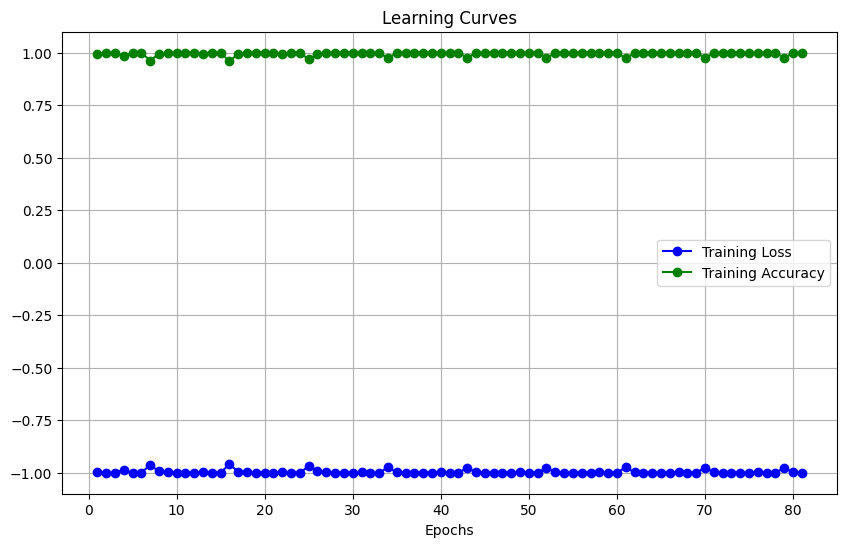

In [57]:
# Extract training and validation loss
train_loss = -history_01.cv_results_['mean_train_score']
val_loss = -history_01.cv_results_['mean_test_score']

# Extract training and validation accuracy
train_accuracy = history_01.cv_results_['mean_train_score']
val_accuracy = history_01.cv_results_['mean_test_score']


# Create epochs array
epochs = np.arange(1, len(train_loss) + 1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label='Training Loss', color='blue')
#plt.plot(epochs, val_loss, marker='o', label='Validation Loss', color='orange')
plt.plot(epochs, train_accuracy, marker='o', label='Training Accuracy', color='green')
#plt.plot(epochs, val_accuracy, marker='o', label='Validation Accuracy', color='red')

plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend()
plt.show()


In [78]:
# THIRD MODEL:
# Now we gonna FINE TUNE the hypermarameters according to what we found before:

pca = PCA(n_components=50)
xgb_model = XGBClassifier(objective='multi:softprob',
                          learning_rate=0.03,
                          max_depth=3,
                          min_child_weight=3,
                          n_estimators=150,
                          gamma=0.0,
                          reg_alpha=0.01,
                          n_jobs=4
                          )

# Define the pipeline including PCA and XGBoost
pipeline_02 = Pipeline([
    ('pca', pca),
    ('xgb', xgb_model)
])



# Fit data to Grid Search
history_tuned = pipeline_02.fit(X_train, y_train.values.ravel())

history_tuned

Pipeline(steps=[('pca', PCA(n_components=50)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150, n_jobs=4,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [69]:
# Evaluate the best model on the validation set
val_predictions_tuned = pipeline_02.predict(X_val)
val_accuracy_tuned= accuracy_score(y_val, val_predictions)
print("Validation accuracy: {:.2f}".format(val_accuracy_tuned))

Validation accuracy: 0.59


Maximum accuracy found with XGBoost was: **Validation accuracy: 0.59**

In [83]:
# Predictions on test data:

y_test = test_data
predictions = pipeline_02.predict(y_test)

# Show the predicted labels
print(predictions)

[2 4 3 0 4 2 2 3 0 3 4 3 3 3 0 3 2 1 3 0 1 0 1 2 2 1 0 3 0 0 1 0 1 0 2 4 4
 4 0 0]
